In [67]:
import os
os.chdir("D:/7080/HW-5")

In [68]:
import pandas as pd
import numpy as np
from lifelines import WeibullAFTFitter, LogLogisticAFTFitter

# Load the data (replace 'file_path' with the actual path of your dataset)
file_path = "hw5_data.txt"
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=[
    "Household_Number", "Delay_Departure", "Average_Delay_Minutes", "Activity_Type",
    "Delays_Past_Week", "Mode_Transport", "Primary_Route", "Traffic_Encountered",
    "Age_Group", "Gender", "Number_Cars", "Number_Children", "Income_Group",
    "Flexible_Hours", "Work_Home_Distance", "LOS_D_or_Worse", "Travel_Time_Ratio",
    "Work_Zone_Population", "Retail_Employment", "Service_Employment", "Work_Zone_Size"
])

<ipython-input-68-eb31b8933f9b>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=[


In [69]:
# Drop rows where Average_Delay_Minutes is 0
data = data[data["Average_Delay_Minutes"] != 0]

# Add the dependent variable (natural log of Average_Delay_Minutes)
data["ln_Average_Delay_Minutes"] = np.log(data["Average_Delay_Minutes"])

In [70]:
# Generating a descriptive statistics table for the dataset
descriptive_stats = data.describe()
descriptive_stats

,Household_Number,Delay_Departure,Average_Delay_Minutes,Activity_Type,Delays_Past_Week,Mode_Transport,Primary_Route,Traffic_Encountered,Age_Group,Gender,...,Income_Group,Flexible_Hours,Work_Home_Distance,LOS_D_or_Worse,Travel_Time_Ratio,Work_Zone_Population,Retail_Employment,Service_Employment,Work_Zone_Size,ln_Average_Delay_Minutes
count,96.000000,96.0,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1102.906250,1.0,51.291667,1.656250,1.833333,1.750000,3.260417,0.760417,2.781250,0.697917,...,2.750000,0.635417,7.708333,0.989583,1.959375,26240.250000,4384.541667,9462.947917,3090.718750,3.706844
std,59.493667,0.0,37.467155,0.722978,1.373943,1.289635,1.416034,0.429070,1.603963,0.461571,...,1.596048,0.483840,4.898800,0.102062,0.316753,10041.055678,3947.737993,9672.063167,1517.563787,0.699731
min,1001.000000,1.0,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,1.200000,1303.000000,796.000000,1325.000000,475.000000,1.386294
25%,1053.750000,1.0,30.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,4.000000,1.000000,1.800000,23026.000000,1866.000000,1783.000000,2472.000000,3.401197
50%,1102.500000,1.0,40.000000,2.000000,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,6.000000,1.000000,2.000000,28497.000000,3906.000000,10582.000000,2753.000000,3.688879
75%,1152.250000,1.0,60.000000,2.000000,3.000000,2.000000,5.000000,1.000000,4.000000,1.000000,...,4.000000,1.000000,9.250000,1.000000,2.200000,34895.000000,3966.000000,10582.000000,3366.000000,4.094345
max,1203.000000,1.0,240.000000,3.000000,5.000000,5.000000,5.000000,1.000000,7.000000,1.000000,...,6.000000,1.000000,25.000000,1.000000,2.500000,34895.000000,16523.000000,38607.000000,5653.000000,5.480639


In [71]:
# Drop specified columns
columns_to_drop = ["Household_Number", "Delay_Departure", "Number_Cars", "Number_Children", "Income_Group"]
data = data.drop(columns=columns_to_drop)

# Display the remaining columns to confirm
print(f"Remaining columns:\n{data.columns.tolist()}")


Remaining columns:
['Average_Delay_Minutes', 'Activity_Type', 'Delays_Past_Week', 'Mode_Transport', 'Primary_Route', 'Traffic_Encountered', 'Age_Group', 'Gender', 'Flexible_Hours', 'Work_Home_Distance', 'LOS_D_or_Worse', 'Travel_Time_Ratio', 'Work_Zone_Population', 'Retail_Employment', 'Service_Employment', 'Work_Zone_Size', 'ln_Average_Delay_Minutes']


In [72]:
# Create a new column for Workzone Density
data["Workzone_Density"] = data["Work_Zone_Population"] / data["Work_Zone_Size"]

In [73]:
# Drop specified columns
columns_to_drop = ["Average_Delay_Minutes", "Work_Zone_Population", "Work_Zone_Size"]
data = data.drop(columns=columns_to_drop)

In [74]:
# Display the remaining columns to confirm
print(f"Remaining columns:\n{data.columns.tolist()}")

Remaining columns:
['Activity_Type', 'Delays_Past_Week', 'Mode_Transport', 'Primary_Route', 'Traffic_Encountered', 'Age_Group', 'Gender', 'Flexible_Hours', 'Work_Home_Distance', 'LOS_D_or_Worse', 'Travel_Time_Ratio', 'Retail_Employment', 'Service_Employment', 'ln_Average_Delay_Minutes', 'Workzone_Density']


In [75]:
# Define the independent variables
independent_vars = ['Activity_Type', 'Delays_Past_Week', 'Mode_Transport',  
                  'Age_Group', 'Gender', 'Flexible_Hours', 'Work_Home_Distance',
                    'LOS_D_or_Worse', 'Travel_Time_Ratio', 'Retail_Employment', 'Service_Employment', 'Workzone_Density']


In [76]:
data.reset_index()

,index,Activity_Type,Delays_Past_Week,Mode_Transport,Primary_Route,Traffic_Encountered,Age_Group,Gender,Flexible_Hours,Work_Home_Distance,LOS_D_or_Worse,Travel_Time_Ratio,Retail_Employment,Service_Employment,ln_Average_Delay_Minutes,Workzone_Density
0,1,1,1,1,2,1,2,0,0,14,1,1.8,6430,3206,3.401197,12.223335
1,5,1,3,1,2,1,7,1,0,14,1,1.8,6430,3206,3.637586,12.223335
2,8,1,0,2,2,1,3,1,0,22,1,1.7,6430,3206,3.806662,12.223335
3,12,2,2,1,2,1,1,1,1,12,1,1.5,2109,2552,2.708050,1.007734
4,14,1,3,1,2,1,7,1,0,8,1,1.7,2109,2552,2.302585,1.007734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,198,1,3,1,4,1,2,1,1,10,1,1.8,16523,38607,3.688879,13.309474
92,199,1,0,4,3,1,5,1,1,8,1,2.0,16523,38607,3.401197,13.309474
93,201,3,2,1,5,0,1,1,1,5,1,2.3,3966,10582,5.480639,12.675263
94,202,1,2,1,2,1,3,1,1,5,1,2.0,16523,38607,4.094345,13.309474


In [77]:
# Prepare the dataset for modeling
X = data[independent_vars]
y = data["ln_Average_Delay_Minutes"]

# Add a 'duration' and 'event_observed' column for lifelines models
data["duration"] = y
data["event_observed"] = 1  # Assuming all events are observed (no censored data)

In [78]:
# Drop missing or infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

In [79]:
# Standardize continuous variables
continuous_vars = [
    "Delays_Past_Week", "Work_Home_Distance", "Travel_Time_Ratio", 
    "Retail_Employment", "Service_Employment", "Workzone_Density"
]

In [80]:
scaler = StandardScaler()
data[continuous_vars] = scaler.fit_transform(data[continuous_vars])

In [81]:
# Prepare the dataset for modeling
X = data[independent_vars]
y = data["ln_Average_Delay_Minutes"]

In [82]:
data

,Activity_Type,Delays_Past_Week,Mode_Transport,Primary_Route,Traffic_Encountered,Age_Group,Gender,Flexible_Hours,Work_Home_Distance,LOS_D_or_Worse,Travel_Time_Ratio,Retail_Employment,Service_Employment,ln_Average_Delay_Minutes,Workzone_Density,duration,event_observed
1,1,-0.609711,1,2,1,2,0,0,1.291070,1,-0.505794,0.520854,-0.650305,3.401197,0.564848,3.401197,1
5,1,0.853595,1,2,1,7,1,0,1.291070,1,-0.505794,0.520854,-0.650305,3.637586,0.564848,3.637586,1
8,1,-1.341364,2,2,1,3,1,0,2.932695,1,-0.823155,0.520854,-0.650305,3.806662,0.564848,3.806662,1
12,2,0.121942,1,2,1,1,1,1,0.880664,1,-1.457877,-0.579442,-0.718278,2.708050,-2.090432,2.708050,1
14,1,0.853595,1,2,1,7,1,0,0.059851,1,-0.823155,-0.579442,-0.718278,2.302585,-2.090432,2.302585,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1,0.853595,1,4,1,2,1,1,0.470257,1,-0.505794,3.090929,3.029037,3.688879,0.821990,3.688879,1
199,1,-1.341364,4,3,1,5,1,1,0.059851,1,0.128928,3.090929,3.029037,3.401197,0.821990,3.401197,1
201,3,0.121942,1,5,0,1,1,1,-0.555759,1,1.081011,-0.106577,0.116307,5.480639,0.671841,5.480639,1
202,1,0.121942,1,2,1,3,1,1,-0.555759,1,0.128928,3.090929,3.029037,4.094345,0.821990,4.094345,1


In [83]:
# Drop specified columns
columns_to_drop = ["ln_Average_Delay_Minutes"]
data = data.drop(columns=columns_to_drop)

In [84]:
data

,Activity_Type,Delays_Past_Week,Mode_Transport,Primary_Route,Traffic_Encountered,Age_Group,Gender,Flexible_Hours,Work_Home_Distance,LOS_D_or_Worse,Travel_Time_Ratio,Retail_Employment,Service_Employment,Workzone_Density,duration,event_observed
1,1,-0.609711,1,2,1,2,0,0,1.291070,1,-0.505794,0.520854,-0.650305,0.564848,3.401197,1
5,1,0.853595,1,2,1,7,1,0,1.291070,1,-0.505794,0.520854,-0.650305,0.564848,3.637586,1
8,1,-1.341364,2,2,1,3,1,0,2.932695,1,-0.823155,0.520854,-0.650305,0.564848,3.806662,1
12,2,0.121942,1,2,1,1,1,1,0.880664,1,-1.457877,-0.579442,-0.718278,-2.090432,2.708050,1
14,1,0.853595,1,2,1,7,1,0,0.059851,1,-0.823155,-0.579442,-0.718278,-2.090432,2.302585,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1,0.853595,1,4,1,2,1,1,0.470257,1,-0.505794,3.090929,3.029037,0.821990,3.688879,1
199,1,-1.341364,4,3,1,5,1,1,0.059851,1,0.128928,3.090929,3.029037,0.821990,3.401197,1
201,3,0.121942,1,5,0,1,1,1,-0.555759,1,1.081011,-0.106577,0.116307,0.671841,5.480639,1
202,1,0.121942,1,2,1,3,1,1,-0.555759,1,0.128928,3.090929,3.029037,0.821990,4.094345,1


In [85]:
from lifelines import CoxPHFitter
# Fit the Exponential Model using Cox Proportional Hazards
cox_model = CoxPHFitter()
cox_model.fit(data, duration_col="duration", event_col="event_observed")

<lifelines.CoxPHFitter: fitted with 96 total observations, 0 right-censored observations>

In [86]:
cox_model.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Activity_Type,-0.304983,0.737136,0.170351,-0.638865,0.028899,0.527891,1.029321,0.0,-1.790320,0.073402,3.768028
Delays_Past_Week,0.183419,1.201318,0.106247,-0.024822,0.391661,0.975484,1.479435,0.0,1.726341,0.084286,3.568563
Mode_Transport,-0.033731,0.966832,0.090877,-0.211847,0.144386,0.809088,1.155330,0.0,-0.371167,0.710513,0.493067
Primary_Route,0.089114,1.093205,0.087209,-0.081813,0.260041,0.921444,1.296984,0.0,1.021842,0.306856,1.704367
Traffic_Encountered,-0.238295,0.787970,0.267879,-0.763329,0.286738,0.466112,1.332075,0.0,-0.889563,0.373700,1.420046
Age_Group,0.008107,1.008140,0.081914,-0.152442,0.168655,0.858609,1.183712,0.0,0.098966,0.921165,0.118468
Gender,0.150496,1.162411,0.255427,-0.350131,0.651124,0.704596,1.917695,0.0,0.589196,0.555730,0.847544
Flexible_Hours,-0.114355,0.891942,0.250108,-0.604557,0.375847,0.546317,1.456225,0.0,-0.457222,0.647512,0.627022
Work_Home_Distance,-0.333607,0.716335,0.136680,-0.601494,-0.065720,0.547992,0.936393,0.0,-2.440798,0.014655,6.092479


In [87]:
# Fit Weibull model
weibull_model = WeibullAFTFitter()
weibull_model.fit(data, duration_col="duration", event_col="event_observed")
weibull_model.summary


coef  exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                            
lambda_ Activity_Type        0.045848   1.046915  0.023673       -0.000551   
        Age_Group           -0.001223   0.998778  0.011419       -0.023603   
        Delays_Past_Week    -0.026555   0.973794  0.014704       -0.055375   
        Flexible_Hours       0.018167   1.018333  0.034594       -0.049636   
        Gender              -0.018008   0.982153  0.034772       -0.086161   
        LOS_D_or_Worse      -0.113872   0.892372  0.165019       -0.437304   
        Mode_Transport       0.004621   1.004631  0.012453       -0.019787   
        Primary_Route       -0.012245   0.987830  0.012002       -0.035769   
        Retail_Employment   -0.079370   0.923698  0.061692       -0.200285   
        Service_Employment   0.060928   1.062822  0.067950       -0.072252   
        Traffic_Encountered  0.025478   1.025806  0.036889       -0.046822   
        Travel_Time_Ratio    0.086093   1.089908  0.018550        0.049737   
        Work_Home_Distance   0.048263   1.049446  0.018414        0.012172   
        Workzone_Density     0.003735   1.003742  0.022545       -0.040453   
        Intercept            1.424372   4.155248  0.175353        1.080687   
rho_    Intercept            1.974887   7.205803  0.080653        1.816810   

                             coef upper 95%  exp(coef) lower 95%  \
param   covariate                                                  
lambda_ Activity_Type              0.092247             0.999449   
        Age_Group                  0.021158             0.976673   
        Delays_Past_Week           0.002264             0.946131   
        Flexible_Hours             0.085969             0.951576   
        Gender                     0.050144             0.917447   
        LOS_D_or_Worse             0.209559             0.645775   
        Mode_Transport             0.029028             0.980407   
        Primary_Route              0.011279             0.964864   
        Retail_Employment          0.041545             0.818498   
        Service_Employment         0.194107             0.930296   
        Traffic_Encountered        0.097779             0.954257   
        Travel_Time_Ratio          0.122450             1.050994   
        Work_Home_Distance         0.084354             1.012246   
        Workzone_Density           0.047923             0.960355   
        Intercept                  1.768057             2.946702   
rho_    Intercept                  2.132963             6.152204   

                             exp(coef) upper 95%  cmp to          z  \
param   covariate                                                     
lambda_ Activity_Type                   1.096636     0.0   1.936701   
        Age_Group                       1.021383     0.0  -0.107093   
        Delays_Past_Week                1.002267     0.0  -1.805965   
        Flexible_Hours                  1.089773     0.0   0.525149   
        Gender                          1.051423     0.0  -0.517886   
        LOS_D_or_Worse                  1.233134     0.0  -0.690055   
        Mode_Transport                  1.029454     0.0   0.371033   
        Primary_Route                   1.011342     0.0  -1.020242   
        Retail_Employment               1.042420     0.0  -1.286537   
        Service_Employment              1.214227     0.0   0.896653   
        Traffic_Encountered             1.102719     0.0   0.690676   
        Travel_Time_Ratio               1.130262     0.0   4.641252   
        Work_Home_Distance              1.088014     0.0   2.620981   
        Workzone_Density                1.049090     0.0   0.165672   
        Intercept                       5.859460     0.0   8.122888   
rho_    Intercept                       8.439837     0.0  24.486318   

                                         p    -log2(p)  
param   covariate                                       
lambda_ Ac

In [88]:

# Fit Log-Logistic model
loglogistic_model = LogLogisticAFTFitter()
loglogistic_model.fit(data, duration_col="duration", event_col="event_observed")
loglogistic_model.summary


coef  exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                            
alpha_ Activity_Type        0.050644   1.051949  0.025118        0.001414   
       Age_Group            0.004059   1.004067  0.012373       -0.020191   
       Delays_Past_Week    -0.013560   0.986531  0.018668       -0.050149   
       Flexible_Hours       0.047047   1.048171  0.041738       -0.034758   
       Gender              -0.018814   0.981362  0.040318       -0.097837   
       LOS_D_or_Worse      -0.107084   0.898451  0.170160       -0.440590   
       Mode_Transport       0.007632   1.007661  0.015237       -0.022233   
       Primary_Route       -0.014290   0.985812  0.014150       -0.042024   
       Retail_Employment   -0.045407   0.955608  0.060724       -0.164424   
       Service_Employment   0.027122   1.027493  0.068732       -0.107589   
       Traffic_Encountered  0.033218   1.033776  0.042859       -0.050784   
       Travel_Time_Ratio    0.064888   1.067040  0.022074        0.021624   
       Work_Home_Distance   0.052162   1.053547  0.022469        0.008125   
       Workzone_Density     0.028092   1.028490  0.024633       -0.020188   
       Intercept            1.303677   3.682812  0.194871        0.921736   
beta_  Intercept            2.350543  10.491269  0.085270        2.183417   

                            coef upper 95%  exp(coef) lower 95%  \
param  covariate                                                  
alpha_ Activity_Type              0.099875             1.001415   
       Age_Group                  0.028309             0.980012   
       Delays_Past_Week           0.023028             0.951088   
       Flexible_Hours             0.128852             0.965839   
       Gender                     0.060208             0.906797   
       LOS_D_or_Worse             0.226423             0.643656   
       Mode_Transport             0.037497             0.978012   
       Primary_Route              0.013444             0.958847   
       Retail_Employment          0.073610             0.848382   
       Service_Employment         0.161834             0.897996   
       Traffic_Encountered        0.117220             0.950484   
       Travel_Time_Ratio          0.108152             1.021860   
       Work_Home_Distance         0.096200             1.008158   
       Workzone_Density           0.076371             0.980015   
       Intercept                  1.685618             2.513649   
beta_  Intercept                  2.517670             8.876584   

                            exp(coef) upper 95%  cmp to          z  \
param  covariate                                                     
alpha_ Activity_Type                   1.105033     0.0   2.016241   
       Age_Group                       1.028713     0.0   0.328081   
       Delays_Past_Week                1.023296     0.0  -0.726389   
       Flexible_Hours                  1.137521     0.0   1.127191   
       Gender                          1.062058     0.0  -0.466644   
       LOS_D_or_Worse                  1.254106     0.0  -0.629312   
       Mode_Transport                  1.038208     0.0   0.500857   
       Primary_Route                   1.013535     0.0  -1.009859   
       Retail_Employment               1.076387     0.0  -0.747761   
       Service_Employment              1.175665     0.0   0.394611   
       Traffic_Encountered             1.124367     0.0   0.775060   
       Travel_Time_Ratio               1.114217     0.0   2.939599   
       Work_Home_Distance              1.100979     0.0   2.321581   
       Workzone_Density                1.079363     0.0   1.140412   
       Intercept                       5.395783     0.0   6.689932   
beta_  Intercept                      12.399672     0.0  27.565811   

                                        p    -log2(p)  
param  covariate                                       
alpha_ Activity_Type         4.377480e-02    4.513755  
       Ag

In [89]:
# Select the two variables
df = data[["Travel_Time_Ratio", "Work_Home_Distance",  "duration", "event_observed"]]

In [90]:
df

,Travel_Time_Ratio,Work_Home_Distance,duration,event_observed
1,-0.505794,1.291070,3.401197,1
5,-0.505794,1.291070,3.637586,1
8,-0.823155,2.932695,3.806662,1
12,-1.457877,0.880664,2.708050,1
14,-0.823155,0.059851,2.302585,1
...,...,...,...,...
198,-0.505794,0.470257,3.688879,1
199,0.128928,0.059851,3.401197,1
201,1.081011,-0.555759,5.480639,1
202,0.128928,-0.555759,4.094345,1


In [91]:
# Fit the Exponential Model
cox_model = CoxPHFitter()
cox_model.fit(df, duration_col="duration", event_col="event_observed")

<lifelines.CoxPHFitter: fitted with 96 total observations, 0 right-censored observations>

In [92]:
cox_model.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Travel_Time_Ratio,-0.493452,0.610515,0.123277,-0.735069,-0.251834,0.479472,0.777374,0.0,-4.002800,0.000063,13.963544
Work_Home_Distance,-0.265537,0.766794,0.123441,-0.507478,-0.023596,0.602012,0.976680,0.0,-2.151118,0.031467,4.990023


In [93]:
# Fit Weibull model
weibull_model = WeibullAFTFitter()
weibull_model.fit(df, duration_col="duration", event_col="event_observed")
weibull_model.summary

coef  exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                           
lambda_ Travel_Time_Ratio   0.079089   1.082300  0.017041        0.045689   
        Work_Home_Distance  0.041015   1.041868  0.018226        0.005293   
        Intercept           1.376714   3.961861  0.016221        1.344921   
rho_    Intercept           1.891571   6.629779  0.079261        1.736224   

                            coef upper 95%  exp(coef) lower 95%  \
param   covariate                                                 
lambda_ Travel_Time_Ratio         0.112489             1.046749   
        Work_Home_Distance        0.076738             1.005307   
        Intercept                 1.408507             3.837883   
rho_    Intercept                 2.046919             5.675869   

                            exp(coef) upper 95%  cmp to          z  \
param   covariate                                                    
lambda_ Travel_Time_Ratio              1.119060     0.0   4.641054   
        Work_Home_Distance             1.079759     0.0   2.250361   
        Intercept                      4.089843     0.0  84.871680   
rho_    Intercept                      7.744007     0.0  23.865235   

                                        p    -log2(p)  
param   covariate                                      
lambda_ Travel_Time_Ratio    3.466361e-06   18.138147  
        Work_Home_Distance   2.442601e-02    5.355438  
        Intercept            0.000000e+00         inf  
rho_    Intercept           7.035980e-126  415.748189

In [94]:
# Fit Log-Logistic model
loglogistic_model = LogLogisticAFTFitter()
loglogistic_model.fit(df, duration_col="duration", event_col="event_observed")
loglogistic_model.summary


coef  exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                           
alpha_ Travel_Time_Ratio   0.069239   1.071692  0.020032        0.029977   
       Work_Home_Distance  0.047611   1.048762  0.019521        0.009351   
       Intercept           1.304522   3.685925  0.018072        1.269101   
beta_  Intercept           2.280410   9.780694  0.085404        2.113022   

                           coef upper 95%  exp(coef) lower 95%  \
param  covariate                                                 
alpha_ Travel_Time_Ratio         0.108500             1.030431   
       Work_Home_Distance        0.085871             1.009395   
       Intercept                 1.339942             3.557654   
beta_  Intercept                 2.447799             8.273206   

                           exp(coef) upper 95%  cmp to          z  \
param  covariate                                                    
alpha_ Travel_Time_Ratio              1.114605     0.0   3.456472   
       Work_Home_Distance             1.089666     0.0   2.438977   
       Intercept                      3.818821     0.0  72.184970   
beta_  Intercept                     11.562865     0.0  26.701528   

                                       p    -log2(p)  
param  covariate                                      
alpha_ Travel_Time_Ratio    5.472957e-04   10.835392  
       Work_Home_Distance   1.472891e-02    6.085206  
       Intercept            0.000000e+00         inf  
beta_  Intercept           4.518325e-157  519.366923

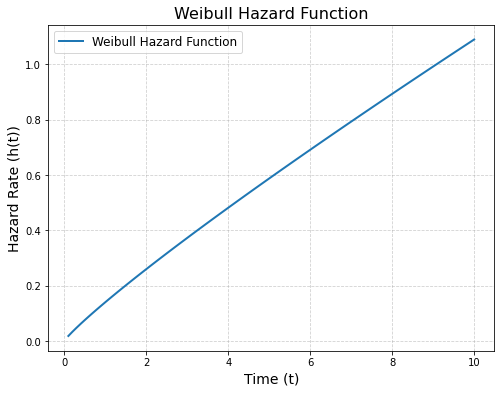

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Weibull parameters from the table
rho = 1.8916  # Shape parameter
lambda_ = np.exp(1.376714)  # Scale parameter from the intercept

# Generate a range of time values
time = np.linspace(0.1, 10, 100)  # Avoid t = 0 to prevent division by zero

# Compute the hazard function
hazard = (rho / lambda_) * (time / lambda_)**(rho - 1)

# Plot the hazard function
plt.figure(figsize=(8, 6))
plt.plot(time, hazard, label="Weibull Hazard Function", linewidth=2)
plt.title("Weibull Hazard Function", fontsize=16)
plt.xlabel("Time (t)", fontsize=14)
plt.ylabel("Hazard Rate (h(t))", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.show()


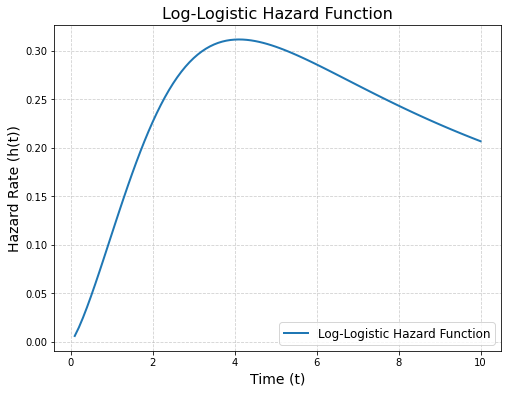

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Log-Logistic parameters from the table
beta = 2.2804  # Shape parameter
alpha = np.exp(1.304522)  # Scale parameter from the intercept

# Generate a range of time values
time = np.linspace(0.1, 10, 100)  # Avoid t = 0 to prevent division by zero

# Compute the hazard function
hazard = (beta * time**(beta - 1)) / (alpha**beta + time**beta)

# Plot the hazard function
plt.figure(figsize=(8, 6))
plt.plot(time, hazard, label="Log-Logistic Hazard Function", linewidth=2)
plt.title("Log-Logistic Hazard Function", fontsize=16)
plt.xlabel("Time (t)", fontsize=14)
plt.ylabel("Hazard Rate (h(t))", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.show()


In [97]:


# Fit the Weibull model (full model with covariates)
weibull_model = WeibullAFTFitter()
weibull_model.fit(df, duration_col="duration", event_col="event_observed")
LL_weibull = weibull_model.log_likelihood_
print(f"Weibull LL(βc): {LL_weibull:.3f}")

# Fit the Log-Logistic model (full model with covariates)
loglogistic_model = LogLogisticAFTFitter()
loglogistic_model.fit(df, duration_col="duration", event_col="event_observed")
LL_loglogistic = loglogistic_model.log_likelihood_
print(f"Log-Logistic LL(βc): {LL_loglogistic:.3f}")

# Fit the null Weibull model (no covariates)
weibull_null = WeibullAFTFitter()
weibull_null.fit(df[["duration", "event_observed"]], duration_col="duration", event_col="event_observed")
LL_0_weibull = weibull_null.log_likelihood_
print(f"Weibull LL(0): {LL_0_weibull:.3f}")

# Fit the null Log-Logistic model (no covariates)
loglogistic_null = LogLogisticAFTFitter()
loglogistic_null.fit(df[["duration", "event_observed"]], duration_col="duration", event_col="event_observed")
LL_0_loglogistic = loglogistic_null.log_likelihood_
print(f"Log-Logistic LL(0): {LL_0_loglogistic:.3f}")


Weibull LL(βc): -93.235
Log-Logistic LL(βc): -97.653
Weibull LL(0): -101.629
Log-Logistic LL(0): -104.051


In [98]:
from scipy.stats import chi2

# Log-likelihoods
LL_0_weibull = -101.629
LL_weibull = -93.235
LL_0_loglogistic = -104.051
LL_loglogistic = -97.653

# Degrees of freedom (number of parameters)
df = 4

# Compute X^2 statistics
X2_weibull = -2 * (LL_0_weibull - LL_weibull)
X2_loglogistic = -2 * (LL_0_loglogistic - LL_loglogistic)

# Compute p-values
p_weibull = chi2.sf(X2_weibull, df)
p_loglogistic = chi2.sf(X2_loglogistic, df)

# Display results
print(f"Weibull Model: X^2 = {X2_weibull:.3f}, p-value = {p_weibull:.5f}")
print(f"Log-Logistic Model: X^2 = {X2_loglogistic:.3f}, p-value = {p_loglogistic:.5f}")

# Compare models
if p_weibull < p_loglogistic:
    print("The Log-Logistic model provides a better fit based on the likelihood ratio statistic.")
else:
    print("The Weibull model provides a better fit based on the likelihood ratio statistic.")


Weibull Model: X^2 = 16.788, p-value = 0.00213
Log-Logistic Model: X^2 = 12.796, p-value = 0.01232
The Log-Logistic model provides a better fit based on the likelihood ratio statistic.


In [99]:
descriptive_stats = data.describe()
descriptive_stats

,Activity_Type,Delays_Past_Week,Mode_Transport,Primary_Route,Traffic_Encountered,Age_Group,Gender,Flexible_Hours,Work_Home_Distance,LOS_D_or_Worse,Travel_Time_Ratio,Retail_Employment,Service_Employment,Workzone_Density,duration,event_observed
count,96.000000,9.600000e+01,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,9.600000e+01,96.000000,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,96.000000,96.0
mean,1.656250,6.476301e-17,1.750000,3.260417,0.760417,2.781250,0.697917,0.635417,7.401487e-17,0.989583,-9.251859e-16,-1.110223e-16,4.625929e-17,1.757853e-16,3.706844,1.0
std,0.722978,1.005249e+00,1.289635,1.416034,0.429070,1.603963,0.461571,0.483840,1.005249e+00,0.102062,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00,0.699731,0.0
min,1.000000,-1.341364e+00,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-1.171368e+00,0.000000,-2.409960e+00,-9.137839e-01,-8.458037e-01,-2.090432e+00,1.386294,1.0
25%,1.000000,-6.097108e-01,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,-7.609618e-01,1.000000,-5.057941e-01,-6.413198e-01,-7.982023e-01,-1.364678e+00,3.401197,1.0
50%,2.000000,1.219422e-01,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,-3.505554e-01,1.000000,1.289279e-01,-1.218555e-01,1.163068e-01,6.718415e-01,3.688879,1.0
75%,2.000000,8.535951e-01,2.000000,5.000000,1.000000,4.000000,1.000000,1.000000,3.163549e-01,1.000000,7.636499e-01,-1.065772e-01,1.163068e-01,6.745765e-01,4.094345,1.0
max,3.000000,2.316901e+00,5.000000,5.000000,1.000000,7.000000,1.000000,1.000000,3.548305e+00,1.000000,1.715733e+00,3.090929e+00,3.029037e+00,1.012958e+00,5.480639,1.0
